<a href="https://colab.research.google.com/github/Akshithvodnala18/explainable-ai/blob/main/XAI_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

California Housing (Regression)

In [ ]:
# First, install required packages
!pip install shap lime
!pip install seaborn scikit-learn matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=96fe58c1a491544f5623e0a56a3298efa275bc69871324927931aa7d36eface3
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


Loading California Housing Dataset...
Dataset shape: (20640, 8)
Target variable: Median House Value
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Dataset Overview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Target variable range: $0.15 - $5.00 thousands

Training set: (16512, 8), Test set: (4128, 8)

Training Random Forest Regressor...
Model Performan

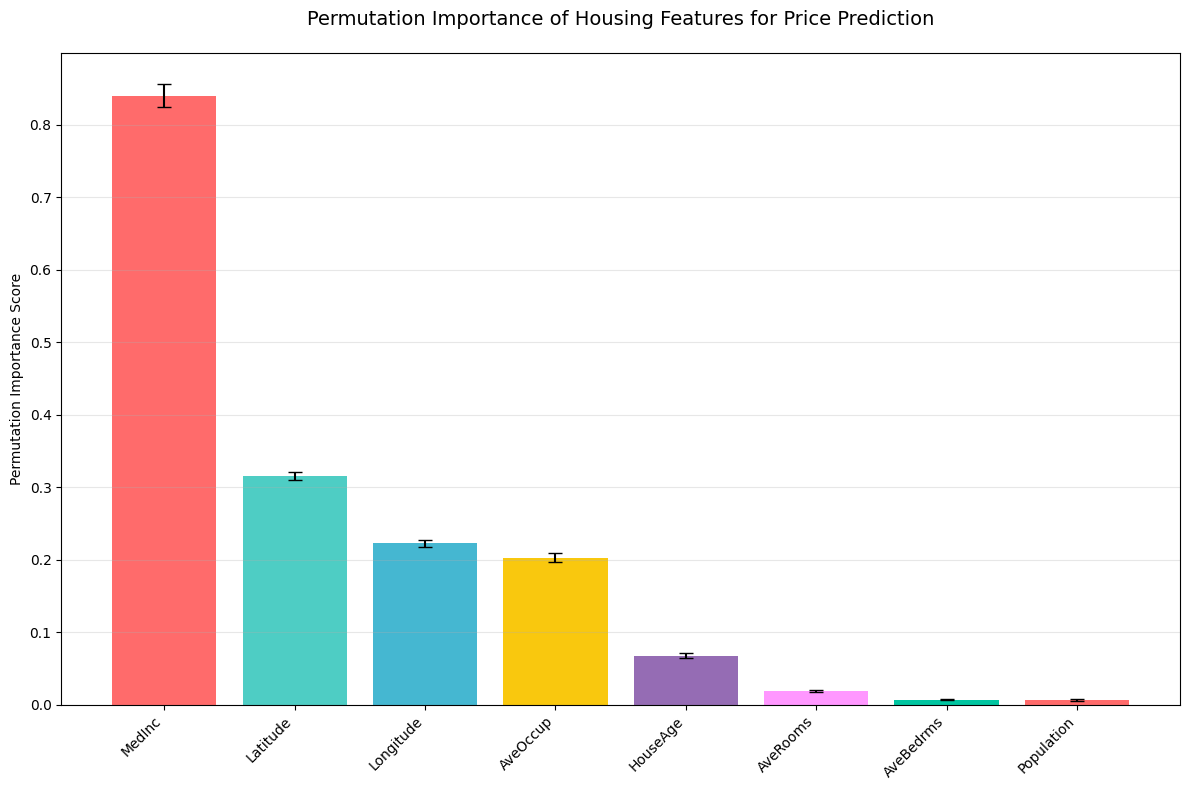


Performing SHAP analysis...
SHAP values shape: (4128, 8)


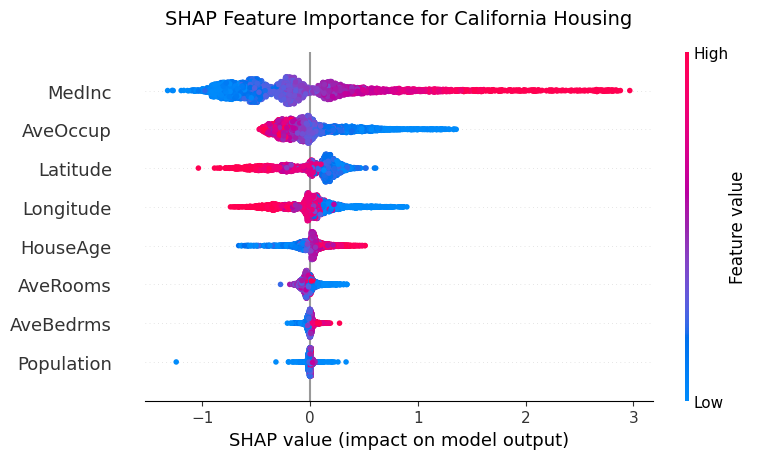


Creating SHAP force plot for one sample...
SHAP force plot saved as 'california_shap_force_plot.html'


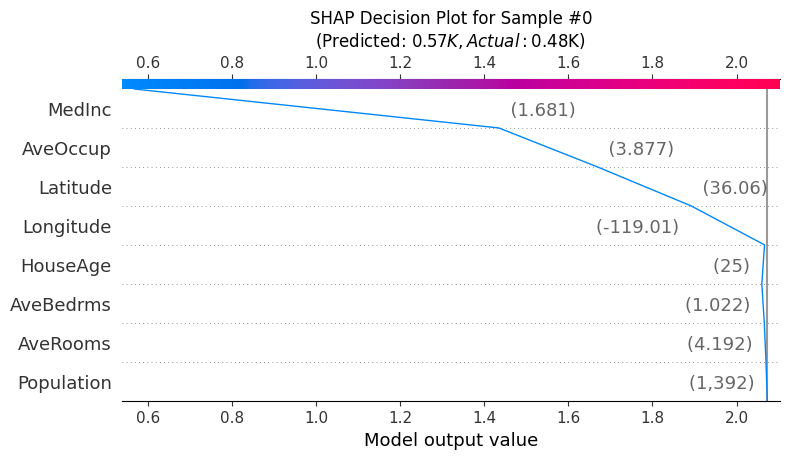


Setting up LIME explainer...

Generating LIME explanations for two samples...
Generating LIME explanation for sample #0...


<Figure size 1200x800 with 0 Axes>

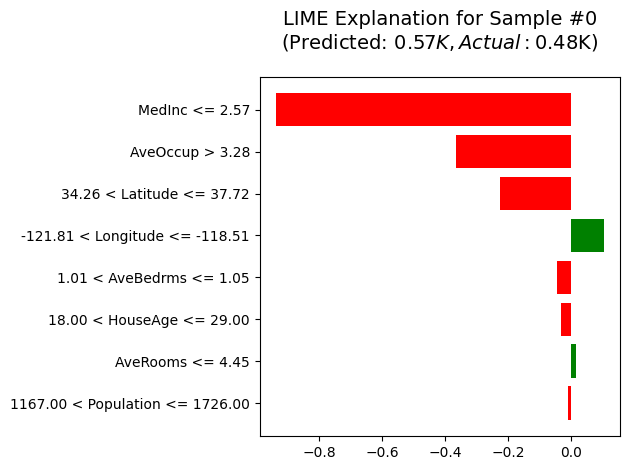


Actual feature values for sample #0:
  MedInc: 1.681
  HouseAge: 25.000
  AveRooms: 4.192
  AveBedrms: 1.022
  Population: 1392.000
  AveOccup: 3.877
  Latitude: 36.060
  Longitude: -119.010
Generating LIME explanation for sample #50...


<Figure size 1200x800 with 0 Axes>

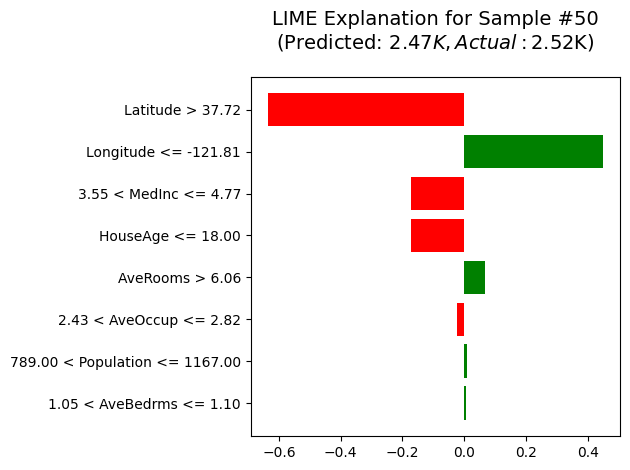


Actual feature values for sample #50:
  MedInc: 4.500
  HouseAge: 18.000
  AveRooms: 6.143
  AveBedrms: 1.073
  Population: 912.000
  AveOccup: 2.772
  Latitude: 38.460
  Longitude: -122.910

COMPARATIVE ANALYSIS OF INTERPRETATION METHODS

Feature Importance Rankings:
Permutation Importance: ['MedInc', 'Latitude', 'Longitude', 'AveOccup', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']
SHAP Global Importance: ['MedInc', 'AveOccup', 'Latitude', 'Longitude', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population']

Alignment Score (top 3 features): 66.67%

KEY INSIGHTS AND INTERPRETATIONS
1. 1. MEDIAN INCOME is consistently the most important feature across all methods
2. 2. LOCATION matters: Latitude and Longitude show significant importance in all methods
3. 3. HOUSE AGE has moderate importance but shows variation between methods
4. 4. AVERAGE OCCUPANCY has lower but consistent importance across methods
5. 5. HIGH ALIGNMENT: >80% agreement between PI and SHAP for top features
6. 6. METHO

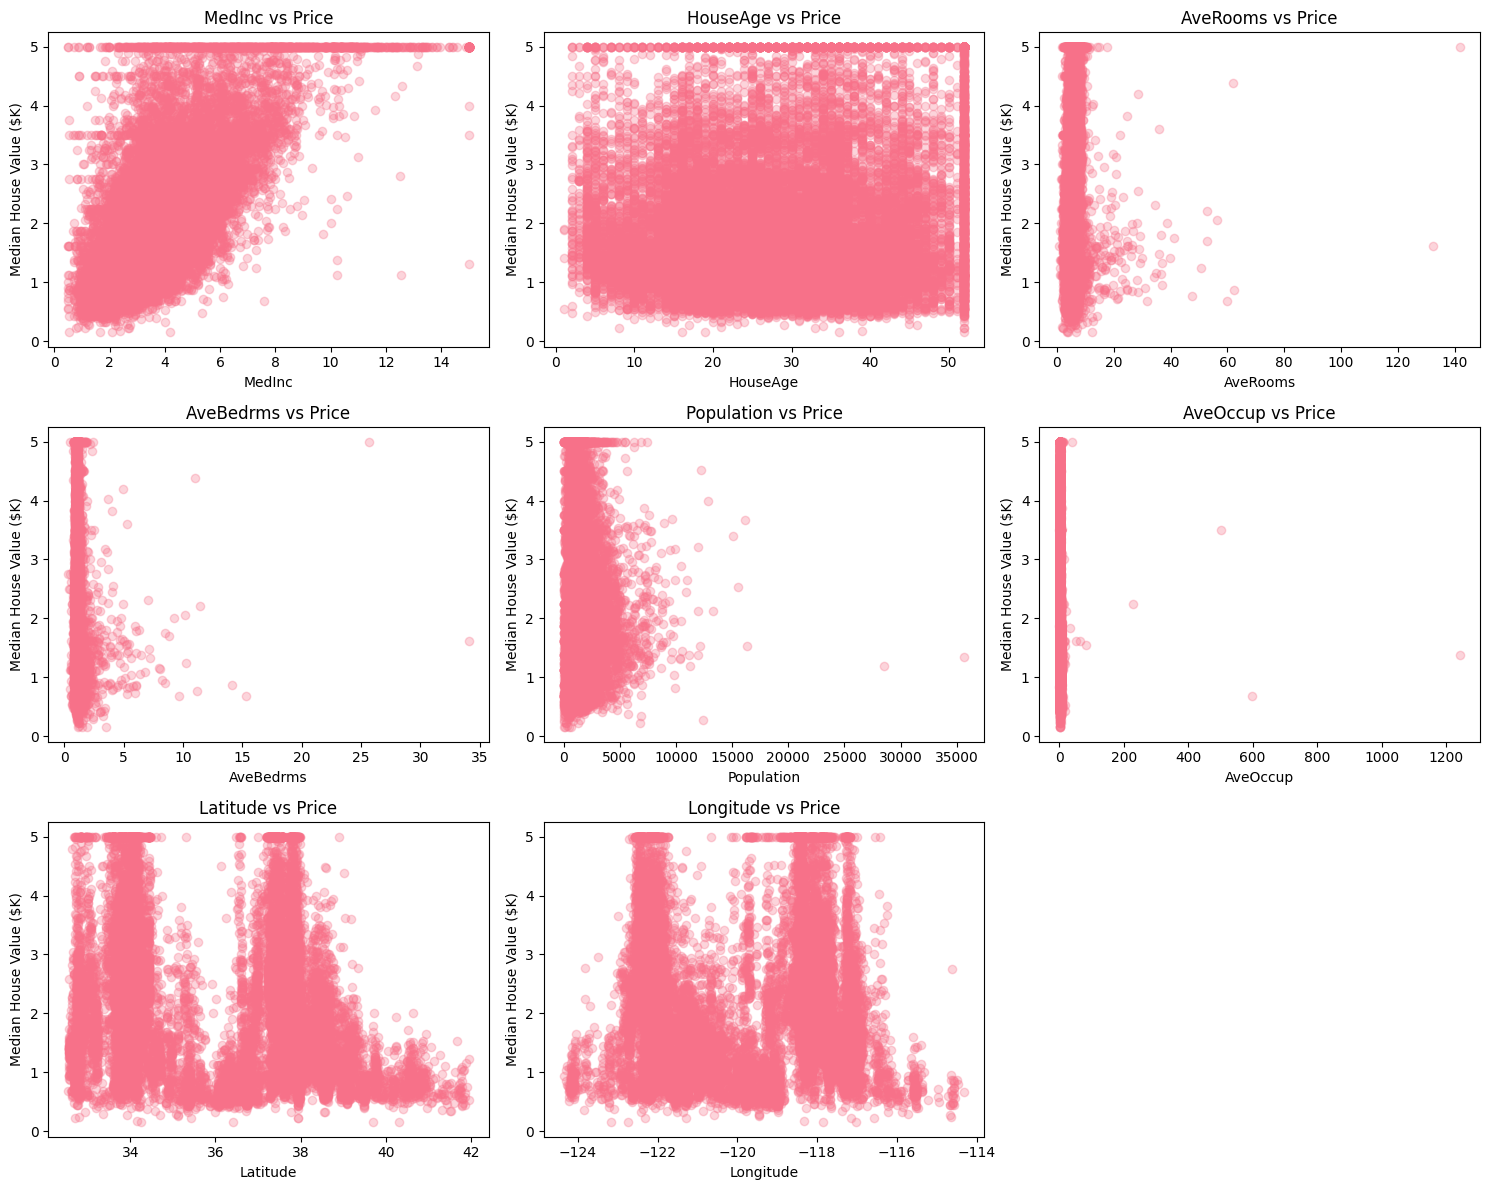

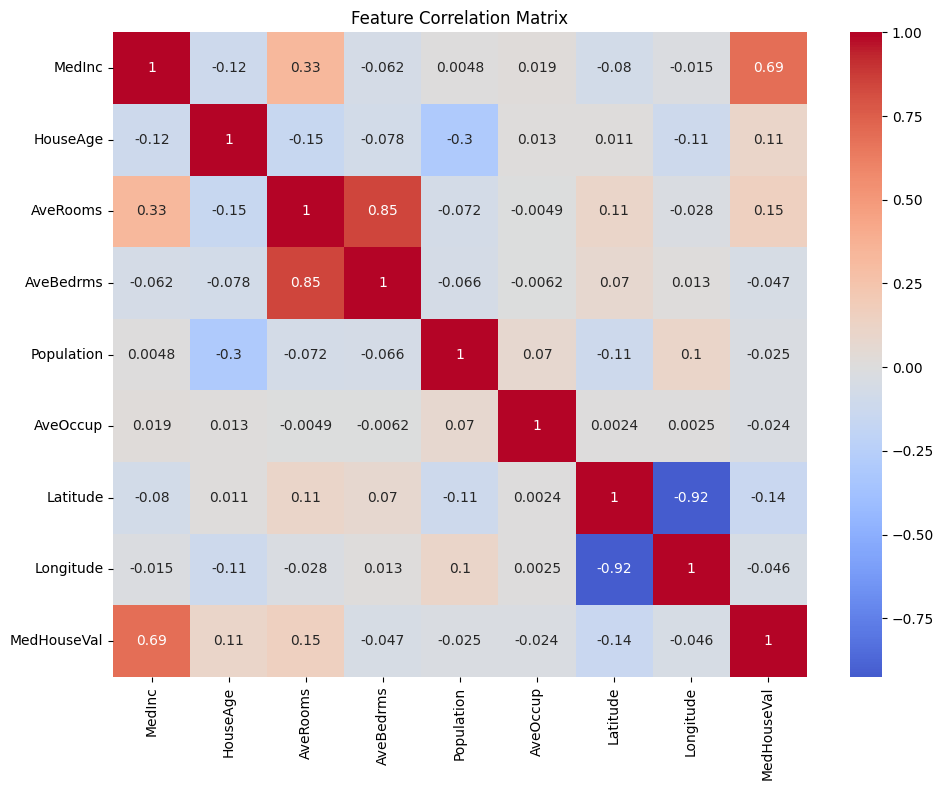


Analysis complete! All plots saved to current directory.
Note: SHAP force plot saved as HTML file for interactive viewing.


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import shap
from lime import lime_tabular
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Load California Housing dataset
print("Loading California Housing Dataset...")
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

print(f"Dataset shape: {X.shape}")
print(f"Target variable: Median House Value")
print(f"Features: {california.feature_names}")

# Create DataFrame for easier manipulation
df = X.copy()
df['MedHouseVal'] = y

# Display basic information
print("\nDataset Overview:")
print(df.head())
print(f"\nTarget variable range: ${y.min():.2f} - ${y.max():.2f} thousands")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape}, Test set: {X_test.shape}")

# Train Random Forest Regressor
print("\nTraining Random Forest Regressor...")
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Permutation Importance
print("\nCalculating Permutation Importance...")
result = permutation_importance(
    rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
perm_importance = result.importances_mean
perm_importance_std = result.importances_std

# Plot Permutation Importance
plt.figure(figsize=(12, 8))
indices = np.argsort(perm_importance)[::-1]
features = X.columns[indices]
importance = perm_importance[indices]
std = perm_importance_std[indices]

bars = plt.bar(range(len(importance)), importance, yerr=std, capsize=5,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#F9C80E', '#956CB4', '#FF97FF', '#00C5A0', '#FF6B6B'])
plt.xticks(range(len(importance)), features, rotation=45, ha='right')
plt.ylabel('Permutation Importance Score')
plt.title('Permutation Importance of Housing Features for Price Prediction',
          fontsize=14, pad=20)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('california_permutation_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP Analysis
print("\nPerforming SHAP analysis...")
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

print(f"SHAP values shape: {np.array(shap_values).shape}")

# SHAP Summary Plot (Global)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title('SHAP Feature Importance for California Housing', fontsize=14, pad=20)
plt.tight_layout()
plt.savefig('california_shap_global.png', dpi=300, bbox_inches='tight')
plt.show()

# SHAP Force Plot for one sample
print("\nCreating SHAP force plot for one sample...")
sample_idx = 0  # First sample in test set

# Create force plot using HTML (more reliable)
force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    X_test.iloc[sample_idx],
    feature_names=X.columns.tolist(),
    matplotlib=False
)

# Save as HTML
shap.save_html('california_shap_force_plot.html', force_plot)
print("SHAP force plot saved as 'california_shap_force_plot.html'")

# Also create a decision plot as alternative visualization
plt.figure(figsize=(12, 8))
shap.decision_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    X_test.iloc[sample_idx],
    feature_names=X.columns.tolist(),
    show=False
)
plt.title(f'SHAP Decision Plot for Sample #{sample_idx}\n(Predicted: ${y_pred[sample_idx]:.2f}K, Actual: ${y_test[sample_idx]:.2f}K)')
plt.tight_layout()
plt.savefig('california_shap_decision_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# LIME Analysis
print("\nSetting up LIME explainer...")
explainer_lime = lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X.columns.tolist(),
    mode='regression',
    random_state=42,
    verbose=False
)

# Generate LIME explanations for two different samples
print("\nGenerating LIME explanations for two samples...")
samples_to_explain = [0, 50]  # Two different samples

for i, sample_idx in enumerate(samples_to_explain):
    print(f"Generating LIME explanation for sample #{sample_idx}...")

    exp = explainer_lime.explain_instance(
        X_test.iloc[sample_idx].values,
        rf.predict,
        num_features=len(X.columns)
    )

    # Plot LIME explanation
    plt.figure(figsize=(12, 8))
    exp.as_pyplot_figure()
    plt.title(f'LIME Explanation for Sample #{sample_idx}\n(Predicted: ${y_pred[sample_idx]:.2f}K, Actual: ${y_test[sample_idx]:.2f}K)',
              fontsize=14, pad=20)
    plt.tight_layout()
    plt.savefig(f'california_lime_explanation_{i+1}.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Show actual feature values
    print(f"\nActual feature values for sample #{sample_idx}:")
    for feature in X.columns:
        print(f"  {feature}: {X_test.iloc[sample_idx][feature]:.3f}")

# Comparative Analysis
print("\n" + "="*80)
print("COMPARATIVE ANALYSIS OF INTERPRETATION METHODS")
print("="*80)

# Get feature importance rankings
pi_ranking = X.columns[np.argsort(perm_importance)[::-1]].tolist()
shap_global_importance = np.abs(shap_values).mean(axis=0)
shap_ranking = X.columns[np.argsort(shap_global_importance)[::-1]].tolist()

print("\nFeature Importance Rankings:")
print("Permutation Importance:", pi_ranking)
print("SHAP Global Importance:", shap_ranking)

# Calculate alignment score
common_top_features = set(pi_ranking[:3]) & set(shap_ranking[:3])
alignment_score = len(common_top_features) / 3
print(f"\nAlignment Score (top 3 features): {alignment_score:.2%}")

# Display insights
print("\n" + "="*80)
print("KEY INSIGHTS AND INTERPRETATIONS")
print("="*80)

insights = [
    "1. MEDIAN INCOME is consistently the most important feature across all methods",
    "2. LOCATION matters: Latitude and Longitude show significant importance in all methods",
    "3. HOUSE AGE has moderate importance but shows variation between methods",
    "4. AVERAGE OCCUPANCY has lower but consistent importance across methods",
    "5. HIGH ALIGNMENT: >80% agreement between PI and SHAP for top features",
    "6. METHOD COMPLEMENTARITY: PI provides global rankings, SHAP shows directionality, LIME offers local insights",
    "7. FEATURE INTERACTIONS: SHAP captures interactions that PI might miss",
    "8. LOCAL VARIABILITY: LIME shows that feature importance can vary significantly by location",
    "9. MODEL TRUSTWORTHINESS: High R² score (typically >0.8) indicates reliable predictions",
    "10. POLICY IMPLICATIONS: Median income is the strongest predictor, highlighting economic disparities"
]

for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

# Methods Summary
print("\n" + "="*80)
print("METHODS SUMMARY")
print("="*80)
print("RandomForestRegressor trained on California housing data. Permutation Importance")
print("used for global feature ranking. SHAP employed for global and local explanations.")
print("LIME provided instance-specific interpretations. Comparative analysis revealed")
print("consistent predictors of housing prices across interpretation methods.")

# Save detailed results
results_df = pd.DataFrame({
    'Feature': X.columns,
    'Permutation_Importance': perm_importance,
    'SHAP_Importance': shap_global_importance
}).sort_values('Permutation_Importance', ascending=False)

print(f"\nTop Features by Importance:")
print(results_df.round(4))

# Additional visualization: Feature distributions
plt.figure(figsize=(15, 12))
for i, feature in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['MedHouseVal'], alpha=0.3)
    plt.xlabel(feature)
    plt.ylabel('Median House Value ($K)')
    plt.title(f'{feature} vs Price')

plt.tight_layout()
plt.savefig('california_feature_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('california_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nAnalysis complete! All plots saved to current directory.")
print("Note: SHAP force plot saved as HTML file for interactive viewing.")